In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
tl = plt.tight_layout

In [2]:
pylab.rcParams['figure.figsize'] = (12, 5)

In [3]:
df = pd.read_csv("train.csv")
original = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


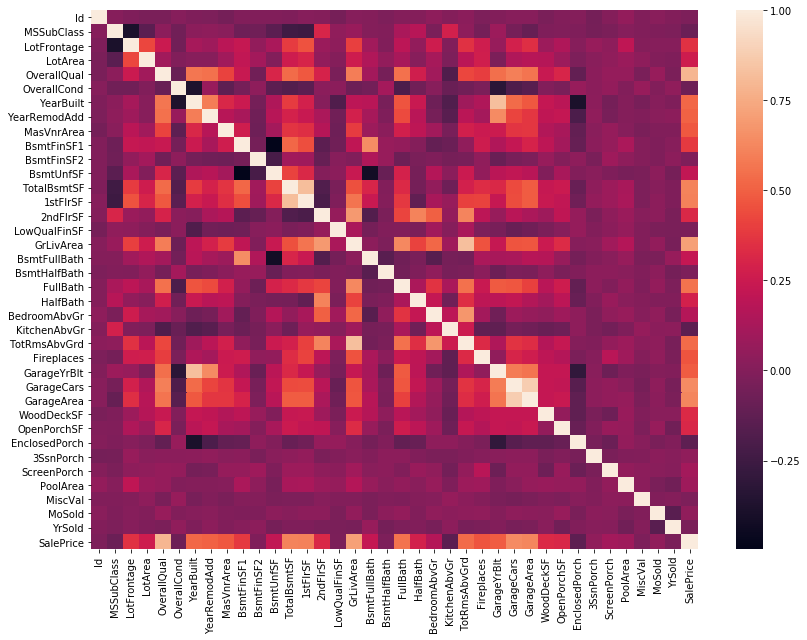

In [4]:
corrmat = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);
tl()

In [5]:
not_required = ["Id", "Street", "Alley", "Utilities", "LandSlope", "Neighborhood", "Condition2",
                "Heating", "GarageYrBlt", "GarageCond", "PavedDrive", "PoolArea", "PoolQC", 
                "Fence", "MiscFeature", "MiscVal", "MoSold", "FireplaceQu", "3SsnPorch"]
required = set(df.columns.tolist()) - set(not_required)
required = list(required)
original_columns_list = required
df = df[required]
df.head()

,SaleType,Condition1,Electrical,FullBath,GrLivArea,Exterior1st,LotConfig,YearRemodAdd,BsmtQual,TotRmsAbvGrd,...,SalePrice,BsmtFinType2,BedroomAbvGr,OverallQual,YrSold,BldgType,RoofStyle,EnclosedPorch,SaleCondition,CentralAir
0,WD,Norm,SBrkr,2,1710,VinylSd,Inside,2003,Gd,8,...,208500,Unf,3,7,2008,1Fam,Gable,0,Normal,Y
1,WD,Feedr,SBrkr,2,1262,MetalSd,FR2,1976,Gd,6,...,181500,Unf,3,6,2007,1Fam,Gable,0,Normal,Y
2,WD,Norm,SBrkr,2,1786,VinylSd,Inside,2002,Gd,6,...,223500,Unf,3,7,2008,1Fam,Gable,0,Normal,Y
3,WD,Norm,SBrkr,1,1717,Wd Sdng,Corner,1970,TA,7,...,140000,Unf,3,7,2006,1Fam,Gable,272,Abnorml,Y
4,WD,Norm,SBrkr,2,2198,VinylSd,FR2,2000,Gd,9,...,250000,Unf,4,8,2008,1Fam,Gable,0,Normal,Y


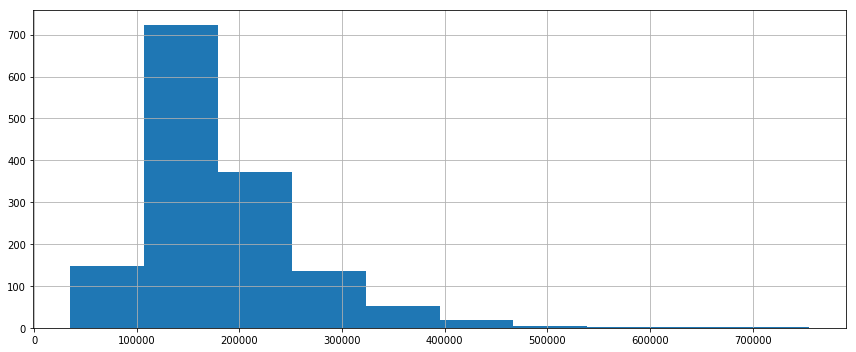

In [6]:
df["SalePrice"].hist()
tl()

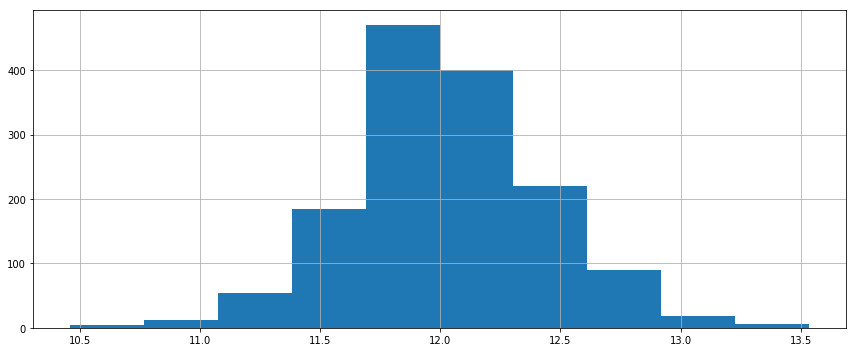

In [7]:
np.log(df["SalePrice"]).hist()
tl()

In [8]:
# log transform sales
df["SalePrice"] = np.log(df["SalePrice"])

In [9]:
df.skew()

FullBath          0.036562
GrLivArea         1.366560
YearRemodAdd     -0.503562
TotRmsAbvGrd      0.676341
GarageCars       -0.342549
HalfBath          0.675897
OpenPorchSF       2.364342
LotArea          12.207688
BsmtFullBath      0.596067
GarageArea        0.179981
BsmtFinSF1        1.685503
YearBuilt        -0.613461
KitchenAbvGr      4.488397
2ndFlrSF          0.813030
BsmtHalfBath      4.103403
OverallCond       0.693067
MSSubClass        1.407657
TotalBsmtSF       1.524255
BsmtFinSF2        4.255261
LotFrontage       2.163569
1stFlrSF          1.376757
ScreenPorch       4.122214
LowQualFinSF      9.011341
Fireplaces        0.649565
MasVnrArea        2.669084
BsmtUnfSF         0.920268
WoodDeckSF        1.541376
SalePrice         0.121335
BedroomAbvGr      0.211790
OverallQual       0.216944
YrSold            0.096269
EnclosedPorch     3.089872
dtype: float64

In [10]:
from sklearn.preprocessing import LabelBinarizer

# label encode "CentralAir"

lb = LabelBinarizer()
df["CentralAir"] = lb.fit_transform(df["CentralAir"])
df.head()

,SaleType,Condition1,Electrical,FullBath,GrLivArea,Exterior1st,LotConfig,YearRemodAdd,BsmtQual,TotRmsAbvGrd,...,SalePrice,BsmtFinType2,BedroomAbvGr,OverallQual,YrSold,BldgType,RoofStyle,EnclosedPorch,SaleCondition,CentralAir
0,WD,Norm,SBrkr,2,1710,VinylSd,Inside,2003,Gd,8,...,12.247694,Unf,3,7,2008,1Fam,Gable,0,Normal,1
1,WD,Feedr,SBrkr,2,1262,MetalSd,FR2,1976,Gd,6,...,12.109011,Unf,3,6,2007,1Fam,Gable,0,Normal,1
2,WD,Norm,SBrkr,2,1786,VinylSd,Inside,2002,Gd,6,...,12.317167,Unf,3,7,2008,1Fam,Gable,0,Normal,1
3,WD,Norm,SBrkr,1,1717,Wd Sdng,Corner,1970,TA,7,...,11.849398,Unf,3,7,2006,1Fam,Gable,272,Abnorml,1
4,WD,Norm,SBrkr,2,2198,VinylSd,FR2,2000,Gd,9,...,12.429216,Unf,4,8,2008,1Fam,Gable,0,Normal,1


In [11]:
# Make YearBuilt to How Old the property is
df["YearBuilt"] = df["YearBuilt"].apply(lambda x: 2018 - x)
df["YearRemodAdd"] = df["YearRemodAdd"].apply(lambda x: 2018 - x)
df["YrSold"] = df["YrSold"].apply(lambda x: 2018 - x)

In [12]:
# check which cols have null values
null_having_cols = df.isnull().any()
null_having_cols = null_having_cols[null_having_cols == True]
null_having_cols = null_having_cols.index.tolist()
print("Columns with null values: {}".format(null_having_cols))

Columns with null values: ['Electrical', 'BsmtQual', 'BsmtExposure', 'MasVnrType', 'GarageFinish', 'GarageQual', 'LotFrontage', 'GarageType', 'BsmtFinType1', 'MasVnrArea', 'BsmtCond', 'BsmtFinType2']


In [13]:
# print percentage null values
for col_name in null_having_cols:
    print("{0} : {1:.2f}".format(col_name, df[col_name].isnull().sum() / len(df)))

Electrical : 0.00
BsmtQual : 0.03
BsmtExposure : 0.03
MasVnrType : 0.01
GarageFinish : 0.06
GarageQual : 0.06
LotFrontage : 0.18
GarageType : 0.06
BsmtFinType1 : 0.03
MasVnrArea : 0.01
BsmtCond : 0.03
BsmtFinType2 : 0.03


In [14]:
# replace "NA" with "NO" to avoid confusion with nan
df["GarageType"] = df["GarageType"].fillna("NO")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NO")
df["MasVnrType"]= df["MasVnrType"].fillna("NO")
df["BsmtExposure"]= df["BsmtExposure"].fillna("NOB") # no is already present
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NO")
df["GarageType"] = df["GarageType"].fillna("NO")
df["GarageFinish"] = df["GarageFinish"].fillna("NO")
df["GarageQual"] = df["GarageQual"].fillna("NO")
df["BsmtQual"] = df["BsmtQual"].fillna("NO")
df["Electrical"] = df["Electrical"].fillna("SBrkr") # there is only 1 nan in "Electrical" 
df["BsmtCond"] = df["BsmtCond"].fillna("NO");

In [15]:
# check which cols have null values
null_having_cols = df.isnull().any()
null_having_cols = null_having_cols[null_having_cols == True]
null_having_cols = null_having_cols.index.tolist()
print("Columns with null values: {}".format(null_having_cols))

Columns with null values: ['LotFrontage', 'MasVnrArea']


In [16]:
from sklearn.preprocessing import Imputer

# imputer for missing real values
imp = Imputer(strategy="median")
df[null_having_cols] = imp.fit_transform(df[null_having_cols])

In [17]:
df_one_hot = pd.get_dummies(df)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_vars = df_one_hot.columns.tolist()
X_vars.remove("SalePrice")
X = df_one_hot[X_vars]
y = df_one_hot["SalePrice"]
X_sca = StandardScaler()
X = X_sca.fit_transform(X)
y_sca = StandardScaler()
y = y_sca.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor

clf = XGBRegressor(learning_rate=0.15)
clf2 = GradientBoostingRegressor(learning_rate=0.11, n_estimators=500)
clf3 = LGBMRegressor()

In [20]:
from sklearn.metrics import make_scorer, mean_squared_log_error

def exp_log_err(y_true, y_pred):
    try:
        return mean_squared_log_error(np.exp(y_sca.inverse_transform(y_true)), 
                                     np.exp(y_sca.inverse_transform(y_pred)))
    except Exception as e:
        print("Exception", e)
        return np.inf
    
error_function = make_scorer(score_func=exp_log_err, greater_is_better=False)

In [21]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_log_error
# from sklearn.linear_model import PassiveAggressiveRegressor
# from sklearn.svm import SVR

# clf_cv = SVR()

# xgb_parameters = {
#     "learning_rate": np.linspace(0.001, 0.1),
#     "n_estimators": np.floor(np.linspace(50, 500)).astype(int),
#     "booster": ["gbtree", "gblinear", "dart"],
#     "min_child_weight": np.arange(1, 10),
# #     "max_depth": np.arange(1, 10),
#     "reg_alpha": np.linspace(0.01, 0.5),
#     "reg_lambda": np.linspace(0.01, 0.5),
#     "gamma": [0, 0.001, 0.01, 0.05],
    
# }

# gb_parameters = {
#     "loss": ["ls", "lad", "huber", "quantile"],
#     "learning_rate": np.linspace(0.01, 0.5),
#     "n_estimators": np.floor(np.linspace(50, 500)).astype(int),
# }

# lgbm_parameters = {
#     "boosting_type": ["gbdt", "dart", "goss", "rf"],
#     "reg_alpha": np.linspace(0.1, 1),
#     "reg_lambda": np.linspace(0.1, 1)
# }

# ridge_parameters = {
#     "alpha": np.linspace(0.001, 0.5),
#     "tol": np.linspace(0.001, 0.5)
# }

# par_parameters = {
#     "C": np.linspace(0.9, 1),
#     "max_iter": [1000, 1500, 2000],
#     "average": [0, 1]
# }

# svr_params = {
#     "kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "degree": [1, 2, 3, 4, 5, 6, 7, 8],
#     "C": np.linspace(0.5, 1),
#     "epsilon": np.linspace(0.01, 0.2)
# }

# random_search = RandomizedSearchCV(estimator=clf_cv, param_distributions=svr_params,
#                                   scoring=error_function, n_iter=140, cv=7)
# random_search.fit(X, y.ravel())
# print("Best est: {}".format(random_search.best_estimator_))
# print("Best loss: {}".format(random_search.best_score_))

```
Best est: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06999999999999999,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=334, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
       
Best loss: -0.0151683462003115

Best est: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.06999999999999999, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=325,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Best loss: -0.015396024822811565

Best est: Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto',
   tol=0.23522448979591837)
Best loss: -0.022341443960173454

Best est: PassiveAggressiveRegressor(C=0.9408163265306123, average=1, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive',
              max_iter=1000, n_iter=None, random_state=None, shuffle=True,
              tol=None, verbose=0, warm_start=False)
Best loss: -0.0226563802133436

Best est: SVR(C=0.6326530612244898, cache_size=200, coef0=0.0, degree=1,
  epsilon=0.1573469387755102, gamma='auto', kernel='poly', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False)
Best loss: -0.02108130958313247
```

In [22]:
# from sklearn.model_selection import KFold
# from sklearn.neural_network import MLPRegressor

# avg_log_error = 0

# clf1 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.06999999999999999,
#        max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
#        n_estimators=334, n_jobs=1, nthread=None, objective='reg:linear',
#        random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#        seed=None, silent=True, subsample=1)

# clf2 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#              learning_rate=0.06999999999999999, loss='huber', max_depth=3,
#              max_features=None, max_leaf_nodes=None,
#              min_impurity_decrease=0.0, min_impurity_split=None,
#              min_samples_leaf=1, min_samples_split=2,
#              min_weight_fraction_leaf=0.0, n_estimators=325,
#              presort='auto', random_state=None, subsample=1.0, verbose=0,
#              warm_start=False)

# clf3 = LGBMRegressor()

# clf4 = Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
#    normalize=False, random_state=None, solver='auto',
#    tol=0.23522448979591837)

# clf5 = PassiveAggressiveRegressor(C=0.9408163265306123, average=1, epsilon=0.1,
#               fit_intercept=True, loss='epsilon_insensitive',
#               max_iter=1000, n_iter=None, random_state=None, shuffle=True,
#               tol=None, verbose=0, warm_start=False)

# clf6 = SVR(C=0.6326530612244898, cache_size=200, coef0=0.0, degree=1,
#   epsilon=0.1573469387755102, gamma='auto', kernel='poly', max_iter=-1,
#   shrinking=True, tol=0.001, verbose=False)

# clfs = [clf, clf2, clf3, clf4, clf5]


# for train_index, test_index in KFold(n_splits=14, shuffle=True).split(X):
#     y_pred_sum = np.zeros(test_index.shape)
#     for classifier in clfs:
#         classifier.fit(X[train_index], y[train_index].ravel())
#         y_pred_sum += classifier.predict(X[test_index])
#     y_pred = y_pred_sum / len(clfs)
# #     clf =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
# #        colsample_bytree=1, gamma=0, learning_rate=0.06999999999999999,
# #        max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
# #        n_estimators=334, n_jobs=1, nthread=None, objective='reg:linear',
# #        random_state=0, reg_alpha=0.060000000000000005, reg_lambda=0.2, scale_pos_weight=1,
# #        seed=None, silent=True, subsample=1)
# #     clf.fit(X[train_index], y[train_index].ravel())
# #     y_pred = clf.predict(X[test_index])
#     err = exp_log_err(y[test_index], y_pred)
#     avg_log_error += err
# print("Avg log error: {}".format(avg_log_error/14))

In [23]:
# GBoosting                    0.017431612914241813
# GB + XGB                     0.017220569923471943
# GB(Lr = 0.11, est=500) + XGB 0.01617745381607883
# above + lightbgm             0.016096660624601963
# above + logtransform         0.01528462395915424

In [24]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, PassiveAggressiveRegressor

clf1 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06999999999999999,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=334, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

clf2 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.06999999999999999, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=325,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

clf3 = LGBMRegressor()

clf4 = Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto',
   tol=0.23522448979591837)

clf5 = PassiveAggressiveRegressor(C=0.9408163265306123, average=1, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive',
              max_iter=1000, n_iter=None, random_state=None, shuffle=True,
              tol=None, verbose=0, warm_start=False)

clf6 = SVR(C=0.6326530612244898, cache_size=200, coef0=0.0, degree=1,
  epsilon=0.1573469387755102, gamma='auto', kernel='poly', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False)

clfs = [clf1, clf2, clf3, clf4, clf5]


for classifier in clfs:
        classifier.fit(X, y.ravel())

# Testing

In [25]:
test_df = pd.read_csv("test.csv")
original_columns_list.remove("SalePrice")
test_df = test_df[original_columns_list]
test_df.head()

,SaleType,Condition1,Electrical,FullBath,GrLivArea,Exterior1st,LotConfig,YearRemodAdd,BsmtQual,TotRmsAbvGrd,...,Functional,BsmtFinType2,BedroomAbvGr,OverallQual,YrSold,BldgType,RoofStyle,EnclosedPorch,SaleCondition,CentralAir
0,WD,Feedr,SBrkr,1,896,VinylSd,Inside,1961,TA,5,...,Typ,LwQ,2,5,2010,1Fam,Gable,0,Normal,Y
1,WD,Norm,SBrkr,1,1329,Wd Sdng,Corner,1958,TA,6,...,Typ,Unf,3,6,2010,1Fam,Hip,0,Normal,Y
2,WD,Norm,SBrkr,2,1629,VinylSd,Inside,1998,Gd,6,...,Typ,Unf,3,5,2010,1Fam,Gable,0,Normal,Y
3,WD,Norm,SBrkr,2,1604,VinylSd,Inside,1998,TA,7,...,Typ,Unf,3,6,2010,1Fam,Gable,0,Normal,Y
4,WD,Norm,SBrkr,2,1280,HdBoard,Inside,1992,Gd,5,...,Typ,Unf,2,8,2010,TwnhsE,Gable,0,Normal,Y


In [26]:
# Make YearBuilt to How Old the property is
test_df["YearBuilt"] = test_df["YearBuilt"].apply(lambda x: 2018 - x)
test_df["YearRemodAdd"] = test_df["YearRemodAdd"].apply(lambda x: 2018 - x)
test_df["YrSold"] = test_df["YrSold"].apply(lambda x: 2018 - x)

# label binarize CentralAir
test_df["CentralAir"] = lb.transform(test_df["CentralAir"])

In [27]:
# check which cols have null values
null_having_cols_test = test_df.isnull().any()
null_having_cols_test = null_having_cols_test[null_having_cols_test == True]
null_having_cols_test = null_having_cols_test.index.tolist()
print("Columns with null values: {}".format(null_having_cols_test))

Columns with null values: ['SaleType', 'Exterior1st', 'BsmtQual', 'BsmtExposure', 'GarageCars', 'BsmtFullBath', 'GarageArea', 'MasVnrType', 'BsmtFinSF1', 'GarageFinish', 'Exterior2nd', 'BsmtHalfBath', 'GarageQual', 'TotalBsmtSF', 'BsmtFinSF2', 'LotFrontage', 'KitchenQual', 'GarageType', 'BsmtFinType1', 'MSZoning', 'MasVnrArea', 'BsmtUnfSF', 'BsmtCond', 'Functional', 'BsmtFinType2']


In [28]:
# Create custom imputer
from sklearn.base import TransformerMixin

class StringImputer(TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.fill = pd.Series([original[c].value_counts().index[0]
            if original[c].dtype == np.dtype("O") else original[c].mean()
                             for c in X], index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [29]:
simp = StringImputer()
test_df = simp.fit_transform(test_df)

In [30]:
# print percentage null values
for col_name in null_having_cols:
    print("Name: {0}   \tCount: {1}\tPer: {2:.2f}  Type: {3}".format(col_name, 
            test_df[col_name].isnull().sum(), test_df[col_name].isnull().sum() / len(df),
            test_df[col_name].dtype))

Name: LotFrontage   	Count: 0	Per: 0.00  Type: float64
Name: MasVnrArea   	Count: 0	Per: 0.00  Type: float64


In [31]:
test_df_one_hot = pd.get_dummies(test_df)

In [32]:
unset_cols = set(X_vars) - set(test_df_one_hot.columns)
for unset in unset_cols:
    print("Setting : {}".format(unset))
    test_df_one_hot[unset] = 0

Setting : Exterior1st_ImStucc
Setting : HouseStyle_2.5Fin
Setting : GarageFinish_NO
Setting : RoofMatl_Membran
Setting : RoofMatl_ClyTile
Setting : GarageQual_NO
Setting : BsmtQual_NO
Setting : RoofMatl_Roll
Setting : Exterior2nd_Other
Setting : RoofMatl_Metal
Setting : GarageQual_Ex
Setting : BsmtExposure_NOB
Setting : BsmtFinType2_NO
Setting : Exterior1st_Stone
Setting : BsmtFinType1_NO
Setting : Electrical_Mix
Setting : GarageType_NO
Setting : MasVnrType_NO
Setting : BsmtCond_NO


In [33]:
test_final_df = pd.DataFrame()

for index, col_name in enumerate(df_one_hot.columns):
    if col_name == "SalePrice":
        continue
    test_final_df[col_name] = test_df_one_hot[col_name]

In [34]:
results = np.zeros(test_final_df.shape[0])
for classifiers in clfs:
    results += classifiers.predict(X_sca.transform(test_final_df))
results /= len(clfs)

In [35]:
x = np.exp(y_sca.inverse_transform(results))

In [36]:
test_df = pd.read_csv("test.csv")

In [37]:
with open("results.csv", "w") as out:
    out.write("Id,SalePrice\n")
    for indx, row in test_df.iterrows():
        out.write("{}, {}\n".format(row["Id"], x[indx]))

In [38]:
df_one_hot.columns

Index(['FullBath', 'GrLivArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageCars',
       'HalfBath', 'OpenPorchSF', 'LotArea', 'BsmtFullBath', 'GarageArea',
       ...
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=220)

In [39]:
test_final_df.columns


Index(['FullBath', 'GrLivArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageCars',
       'HalfBath', 'OpenPorchSF', 'LotArea', 'BsmtFullBath', 'GarageArea',
       ...
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=219)

In [40]:
np.linspace(0.5, 1)

array([0.5       , 0.51020408, 0.52040816, 0.53061224, 0.54081633,
       0.55102041, 0.56122449, 0.57142857, 0.58163265, 0.59183673,
       0.60204082, 0.6122449 , 0.62244898, 0.63265306, 0.64285714,
       0.65306122, 0.66326531, 0.67346939, 0.68367347, 0.69387755,
       0.70408163, 0.71428571, 0.7244898 , 0.73469388, 0.74489796,
       0.75510204, 0.76530612, 0.7755102 , 0.78571429, 0.79591837,
       0.80612245, 0.81632653, 0.82653061, 0.83673469, 0.84693878,
       0.85714286, 0.86734694, 0.87755102, 0.8877551 , 0.89795918,
       0.90816327, 0.91836735, 0.92857143, 0.93877551, 0.94897959,
       0.95918367, 0.96938776, 0.97959184, 0.98979592, 1.        ])